1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

# Bottle File

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modules for statistics
import math
import statistics
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor

In [221]:
bottle_df = pd.read_csv("bottle.csv") 
bottle_df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(bottle_df)

864863

In [5]:
print(bottle_df.describe())

             Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  864863.000000  864863.000000  864863.000000  853900.000000   
mean    17138.790958  432432.000000     226.831951      10.799677   
std     10240.949817  249664.587269     316.050259       4.243825   
min         1.000000       1.000000       0.000000       1.440000   
25%      8269.000000  216216.500000      46.000000       7.680000   
50%     16848.000000  432432.000000     125.000000      10.060000   
75%     26557.000000  648647.500000     300.000000      13.880000   
max     34404.000000  864863.000000    5351.000000      31.140000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  817509.000000  696201.000000  812174.000000  661274.000000   
mean       33.840350       3.392468      25.819394      57.103779   
std         0.461843       2.073256       1.167787      37.094137   
min        28.431000      -0.010000      20.934000      -0.100000   
25%        33.488000       1.3600

# Check datatypes to see if there are any that need to be changed.

Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.

In [6]:
print(bottle_df.iloc[:, 47].dtypes) #objects
print(bottle_df.iloc[:, 73].dtypes) #objects

#bottle_df.iloc[:, 47] -->to see the name of the column
#bottle_df.iloc[:, 73] -->to see the name of the column

bottle_df['IncTim'].value_counts(dropna=False) #98% of the column contains NaNs. (REMOVED LATER)
bottle_df['DIC Quality Comment'].value_counts(dropna=False) #99% of column contains NaNs (REMOVED LATER)

object
object


NaN                                                                                                                      864808
CTD Bottle Misfire; DIC sample compromised.  CalCOFI Salt and oxygen values are from CTD.                                     9
stn changed to 86.7 45.0 was 86.7 40.0                                                                                        6
Bottle tripped at correct depth                                                                                               4
Depth changed to 170m was100m                                                                                                 2
Depth changed to 100m was 50m                                                                                                 2
DIC Btl_ID 5442 moved to depth 320m was 230m                                                                                  1
DIC Bottle_ID 32 moved to 440m from 515                                                                 

# Check for Duplicate Rows

In [7]:
bottle_df.duplicated().sum()


0

# Removing NaNs

In [8]:
#NaNs 50% and or more
C = bottle_df.columns.tolist()
col_to_drop = []
for i in C:
    A = bottle_df[i].isnull().sum()
    if A >= 432431:
        col_to_drop.append(i)

In [9]:
col_to_drop

['BtlNum',
 'T_qual',
 'S_qual',
 'O_qual',
 'SThtaq',
 'O2Satq',
 'ChlorA',
 'Phaeop',
 'PO4uM',
 'SiO3uM',
 'NO2uM',
 'NO3uM',
 'NH3uM',
 'C14As1',
 'C14A1p',
 'C14As2',
 'C14A2p',
 'DarkAs',
 'DarkAp',
 'MeanAs',
 'MeanAp',
 'IncTim',
 'LightP',
 'R_SIO3',
 'R_PO4',
 'R_NO3',
 'R_NO2',
 'R_NH4',
 'R_CHLA',
 'R_PHAEO',
 'R_SAMP',
 'DIC1',
 'DIC2',
 'TA1',
 'TA2',
 'pH2',
 'pH1',
 'DIC Quality Comment']

In [10]:
bottle_df1 = bottle_df
for i in col_to_drop:
    bottle_df1 = bottle_df1.drop([i], axis = 1)

bottle_df1

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,10


In [11]:
print(bottle_df1.isnull().sum())

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64


# Replacing NaNs

In [12]:
#Columns with less than 50% of NaNs. 
C1 = bottle_df1.columns.tolist()

NaNs_rest = []
for i in C1:
    S = bottle_df1[i].isnull().sum()
    A1 = bottle_df1[i].value_counts(dropna=False)
    if S > 0:
        NaNs_rest.append(i)
        print(A1)

NaN       10963
9.100      1115
9.020      1107
8.880      1102
9.300      1097
          ...  
6.864         1
19.281        1
15.233        1
5.484         1
17.533        1
Name: T_degC, Length: 13848, dtype: int64
NaN        47354
33.5800     3953
33.5700     3239
33.5500     3187
33.4800     3171
           ...  
33.5862        1
33.4486        1
33.8625        1
33.9142        1
33.4218        1
Name: Salnty, Length: 14603, dtype: int64
NaN      168662
5.800      2876
5.760      2821
5.840      2771
5.790      2754
          ...  
0.063         1
3.693         1
4.959         1
1.768         1
6.355         1
Name: O2ml_L, Length: 6501, dtype: int64
NaN         52689
26.97900      488
26.99500      472
26.96900      468
26.62000      464
            ...  
25.21190        1
25.21172        1
25.00873        1
25.00861        1
24.15297        1
Name: STheta, Length: 36369, dtype: int64
NaN       203589
102.40      2740
102.60      2666
102.50      2644
102.30      2618
           

In [13]:
NaNs_rest

['T_degC',
 'Salnty',
 'O2ml_L',
 'STheta',
 'O2Sat',
 'Oxy_µmol/Kg',
 'T_prec',
 'S_prec',
 'P_qual',
 'Chlqua',
 'Phaqua',
 'PO4q',
 'SiO3qu',
 'NO2q',
 'NO3q',
 'NH3q',
 'C14A1q',
 'C14A2q',
 'DarkAq',
 'MeanAq',
 'R_TEMP',
 'R_POTEMP',
 'R_SALINITY',
 'R_SIGMA',
 'R_SVA',
 'R_DYNHT',
 'R_O2',
 'R_O2Sat']

In [14]:
#the NaNs in these columns are best filled with the mean (according to the value_counts() done above) 

for i in NaNs_rest:
    bottle_df1[i] = bottle_df1[i].fillna(bottle_df1[i].mean())

In [15]:
bottle_df1

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,3.392468,25.64900,57.103779,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,3.392498,57.19294,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,3.392468,25.65600,57.103779,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,3.392498,57.19294,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,3.392468,25.65400,57.103779,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,3.392498,57.19294,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,3.392468,25.64300,57.103779,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,3.392498,57.19294,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,3.392468,25.64300,57.103779,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,3.392498,57.19294,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805000,23.87055,108.740000,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.810000,108.70000,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805000,23.87072,108.740000,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.810000,108.70000,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796000,23.88911,108.460000,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.800000,108.50000,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816000,24.01426,107.740000,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.820000,107.70000,10


In [16]:
print(bottle_df1.isnull().sum())

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         0
Phaqua         0
PO4q           0
SiO3qu         0
NO2q           0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_PRES         0
dtype: int64


# Checking to see if there is a proportional relationship between any of the columns because in machine learning this implies duplication. 

In [17]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [18]:
mm = preprocessing.MinMaxScaler()
df_float = bottle_df1.loc[:, bottle_df1.dtypes == 'int64']
df_scaled = pd.DataFrame(mm.fit_transform(df_float), index=df_float.index, columns=df_float.columns)
duplicates = df_scaled.T[df_scaled.T.duplicated()]
duplicates.T

KeyboardInterrupt: 

# Cast File

In [19]:
cast_df = pd.read_csv("cast.csv") 
cast_df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [20]:
len(cast_df)

34404

In [21]:
cast_df.dtypes

Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     float64
Visibility    float64
Length: 61, dtype: object

In [22]:
print(cast_df.describe())

            Cst_Cnt         Cruise      Cruz_Sta      DbSta_ID       Quarter  \
count  34404.000000   34404.000000  3.440400e+04  3.440400e+04  34404.000000   
mean   17202.500000  197406.030781  1.974061e+13  9.330342e+06      2.366556   
std     9931.723667    1974.562207  1.974557e+11  2.217993e+06      1.091894   
min        1.000000  194903.000000  1.949030e+13  1.016800e+05      1.000000   
25%     8601.750000  195701.000000  1.957011e+13  8.100430e+06      1.000000   
50%    17202.500000  196912.000000  1.969121e+13  9.000800e+06      2.000000   
75%    25803.250000  198809.000000  1.988091e+13  1.067032e+07      3.000000   
max    34404.000000  201611.000000  2.016111e+13  1.767030e+07      4.000000   

           Distance         Year         Month   Julian_Date    Julian_Day  \
count  19714.000000  34404.00000  34404.000000  34404.000000  34404.000000   
mean    -116.135017   1974.00218      5.835397  27017.612313    161.366236   
std      117.282768     19.74668      3.32677

# Check datatypes to see if there are any that need to be changed.

Columns (40,41,44,45,46,47) have mixed types

In [23]:
cast_df.iloc[:, 40].value_counts(dropna=False) 
    #16129 NaNs (REMOVED LATER)
    #31A1 needs to be changed to the mode of the column
    #3101.0 needs to be changed to 3101

cast_df.iloc[:, 41].value_counts(dropna=False) #Cruz_Num
    #FRONTS88 433
    
cast_df.iloc[:, 44].value_counts(dropna=False) #Inc_Str (timestamp)
    # 32271 NaNs --> 93% of the column contains NaNs.
    
cast_df.iloc[:, 45].value_counts(dropna=False) #Inc_End (timestamp)
    #32271 NaNs --> 93% of the column contains NaNs.

cast_df.iloc[:, 46].value_counts(dropna=False) #PST-LAN (timestamp)
    #32287 NaNs --> 93% of the column contain NaNs.

cast_df.iloc[:, 47].value_counts(dropna=False) # Civil_T
    #32288 NaNs --> 93% of column contain Nans.


NaN                    32288
12/30/1899 17:47:00       32
12/30/1899 19:42:00       25
12/30/1899 19:41:00       25
12/30/1899 19:09:00       24
                       ...  
12/30/1899 20:44:00        1
12/30/1899 20:47:00        1
12/30/1899 20:55:00        1
12/30/1899 20:50:00        1
12/30/1899 05:46:00        1
Name: Civil_T, Length: 182, dtype: int64

# Check for Duplicate Rows

In [24]:
cast_df.duplicated().sum()

0

In [25]:
print(cast_df.isnull().sum())

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64


# Removing NaNs

In [26]:
#NaNs 50% or more
NaNs_50 = []

cast_col = cast_df.columns.tolist()
for i in cast_col:
    nan_sum = cast_df[i].isnull().sum()
    if nan_sum >= 17202:
        NaNs_50.append(i)
        print(NaNs_50)

['Secchi']
['Secchi', 'ForelU']
['Secchi', 'ForelU', 'Order_Occ']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone', 'Wave_Dir']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone', 'Wave_Dir', 'W

In [27]:
NaNs_50

['Secchi',
 'ForelU',
 'Order_Occ',
 'Cruz_Leg',
 'IntChl',
 'IntC14',
 'Inc_Str',
 'Inc_End',
 'PST_LAN',
 'Civil_T',
 'TimeZone',
 'Wave_Dir',
 'Wave_Ht',
 'Wave_Prd',
 'Cloud_Typ',
 'Cloud_Amt',
 'Visibility']

In [28]:
cast_df1 = cast_df.drop(['Secchi',
 'ForelU',
 'Order_Occ',
 'Cruz_Leg',
 'IntChl',
 'IntC14',
 'Inc_Str',
 'Inc_End',
 'PST_LAN',
 'Civil_T',
 'TimeZone',
 'Wave_Dir',
 'Wave_Ht',
 'Wave_Prd',
 'Cloud_Typ',
 'Cloud_Amt',
 'Visibility'], axis = 1)

In [29]:
print(cast_df1.isnull().sum())

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          3
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
Wind_Dir        1476
Wind_Spd        1679
Barometer      15341
Dry_T          15333
Wet_T          15415
Wea             7597
dtype: int64


# Replacing NaNs

In [30]:
#Columns with less than 50% NaNs.  ( columns)
cast_col2 = cast_df1.columns.tolist()

NaNs_50_less = []
for i in cast_col2:
    nan_sum_50_less = cast_df1[i].isnull().sum()
    value_counts_col = cast_df1[i].value_counts(dropna=False)
    if nan_sum_50_less > 0:
        print(value_counts_col)
        NaNs_50_less.append(i)

 NaN        14690
-38.410       107
-2.130         74
-18.380        73
-316.070       71
            ...  
-108.450        1
-113.040        1
-117.030        1
-121.290        1
-373.979        1
Name: Distance, Length: 9351, dtype: int64
NaN         324
00:00:00    130
06:00:00    111
12:00:00    111
20:48:00    109
           ... 
20:11:11      1
14:46:16      1
18:42:09      1
23:25:12      1
22:39:25      1
Name: Time, Length: 2731, dtype: int64
NaN       2281
3658.0     777
3840.0     512
4023.0     433
3926.0     264
          ... 
1748.0       1
1989.0       1
3326.0       1
2629.0       1
4340.0       1
Name: Bottom_D, Length: 3531, dtype: int64
RV DAVID STARR JORDAN       7140
RV NEW HORIZON              6225
RV ALEXANDER AGASSIZ        3078
BLACK DOUGLAS               3060
HORIZON                     2912
CREST                       2754
NaN                         1690
PAOLINA-T                   1350
STRANGER                     953
SPENCER F. BAIRD             899
ORCA  

In [31]:
NaNs_50_less

['Distance',
 'Time',
 'Bottom_D',
 'Ship_Name',
 'Event_Num',
 'Data_Or',
 'Wind_Dir',
 'Wind_Spd',
 'Barometer',
 'Dry_T',
 'Wet_T',
 'Wea']

In [32]:
#Remove Ship_Name (NaNs cannot be filled with mean because col is str) & Data_Or (will be filled with mode)

NaNs_50_less.remove("Ship_Name")
NaNs_50_less.remove("Data_Or")

In [33]:
#Remove time: mean cannot me taken
NaNs_50_less.remove("Time")

In [34]:
#the NaNs in these columns are best filled with the mean (according to the value_counts() done above) 

for i in NaNs_50_less:
    cast_df1[i] = cast_df1[i].fillna(cast_df1[i].mean())

In [35]:
print(cast_df1.isnull().sum())

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance           0
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D           0
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          0
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
Wind_Dir           0
Wind_Spd           0
Barometer          0
Dry_T              0
Wet_T              0
Wea                0
dtype: int64


In [36]:
#Data_Or: 3101.0 needs to be changed to 3101
cast_df1['Data_Or'] = cast_df1['Data_Or'].replace(3101.0, 3101)

In [37]:
#Data_Or: 
    #16129 NaNs (changed to mode)
    #31A1 needs to be changed to the mode of the column

cast_df1['Data_Or'] = cast_df1['Data_Or'].replace('31A1', 3101)
cast_df1['Data_Or'] = cast_df1['Data_Or'].fillna(cast_df1['Data_Or'].mode()[0])

In [38]:
cast_df1['Data_Or'].value_counts(dropna=False)

3101    32123
3101     2260
3103       11
90         10
Name: Data_Or, dtype: int64

In [39]:
print(cast_df1.isnull().sum())

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
Cast_ID           0
Sta_ID            0
Quarter           0
Sta_Code          0
Distance          0
Date              0
Year              0
Month             0
Julian_Date       0
Julian_Day        0
Time            324
Lat_Dec           0
Lat_Deg           0
Lat_Min           0
Lat_Hem           0
Lon_Dec           0
Lon_Deg           0
Lon_Min           0
Lon_Hem           0
Rpt_Line          0
St_Line           0
Ac_Line           0
Rpt_Sta           0
St_Station        0
Ac_Sta            0
Bottom_D          0
Ship_Name      1690
Ship_Code         0
Data_Type         0
Event_Num         0
Orig_Sta_ID       0
Data_Or           0
Cruz_Num          0
Wind_Dir          0
Wind_Spd          0
Barometer         0
Dry_T             0
Wet_T             0
Wea               0
dtype: int64


In [40]:
#Ship_Name: NaNs changed to unknown
cast_df1['Ship_Name'] = cast_df1['Ship_Name'].replace(np.nan, 'Unknown')

In [41]:
print(cast_df1.isnull().sum())

Cst_Cnt          0
Cruise_ID        0
Cruise           0
Cruz_Sta         0
DbSta_ID         0
Cast_ID          0
Sta_ID           0
Quarter          0
Sta_Code         0
Distance         0
Date             0
Year             0
Month            0
Julian_Date      0
Julian_Day       0
Time           324
Lat_Dec          0
Lat_Deg          0
Lat_Min          0
Lat_Hem          0
Lon_Dec          0
Lon_Deg          0
Lon_Min          0
Lon_Hem          0
Rpt_Line         0
St_Line          0
Ac_Line          0
Rpt_Sta          0
St_Station       0
Ac_Sta           0
Bottom_D         0
Ship_Name        0
Ship_Code        0
Data_Type        0
Event_Num        0
Orig_Sta_ID      0
Data_Or          0
Cruz_Num         0
Wind_Dir         0
Wind_Spd         0
Barometer        0
Dry_T            0
Wet_T            0
Wea              0
dtype: int64


# Checking to see if there is a proportional relationship between any of the columns because in machine learning this implies duplication.

In [42]:
mm = preprocessing.MinMaxScaler()
df_float = cast_df1.loc[:, cast_df1.dtypes == 'float64']
df_scaled = pd.DataFrame(mm.fit_transform(df_float), index=df_float.index, columns=df_float.columns)
duplicates = df_scaled.T[df_scaled.T.duplicated()]
duplicates.T

""
0
1
2
3
4
...
34399
34400
34401
34402


In [43]:
mm = preprocessing.MinMaxScaler()
df_float = cast_df1.loc[:, cast_df1.dtypes == 'int64']
df_scaled = pd.DataFrame(mm.fit_transform(df_float), index=df_float.index, columns=df_float.columns)
duplicates = df_scaled.T[df_scaled.T.duplicated()]
duplicates.T

""
0
1
2
3
4
...
34399
34400
34401
34402


In [44]:
cast_df1

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,-116.135017,...,1.0,054 56,3101,4903,23.0,18.0,1016.243702,16.261989,14.414635,2.000000
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,-116.135017,...,2.0,052 75,3101,4903,16.0,5.0,1016.243702,16.261989,14.414635,4.000000
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,-116.135017,...,3.0,051 85,3101,4903,23.0,5.0,1016.243702,16.261989,14.414635,6.000000
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,-116.135017,...,4.0,050 95,3101,4903,18.0,8.0,1016.243702,16.261989,14.414635,2.000000
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,-116.135017,...,5.0,050 104,3101,4903,27.0,13.0,1016.243702,16.261989,14.414635,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345000,...,168.0,93.3 90.0,3101,1611,34.0,16.0,1017.500000,17.100000,16.400000,1.324729
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297000,...,177.0,93.3 100.0,3101,1611,36.0,14.0,1019.600000,18.000000,16.200000,1.324729
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157000,...,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.600000,19.000000,17.000000,1.000000
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979000,...,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.300000,19.500000,17.100000,1.000000


In [160]:
bottle_df1

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,3.392468,25.64900,57.103779,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,3.392498,57.19294,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,3.392468,25.65600,57.103779,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,3.392498,57.19294,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,3.392468,25.65400,57.103779,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,3.392498,57.19294,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,3.392468,25.64300,57.103779,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,3.392498,57.19294,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,3.392468,25.64300,57.103779,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,3.392498,57.19294,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805000,23.87055,108.740000,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.810000,108.70000,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805000,23.87072,108.740000,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.810000,108.70000,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796000,23.88911,108.460000,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.800000,108.50000,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816000,24.01426,107.740000,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.820000,107.70000,10


2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

# Feature Selection through Correlation Matrix

In [161]:
#Extract numerical columns
Numerical_DF1 = bottle_df1.select_dtypes(include=['float64', 'int64'])



corrMatrix_df = Numerical_DF1.drop(['P_qual', 'Chlqua', 'Phaqua', 'PO4q', 
                                   'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq'], axis = 1)

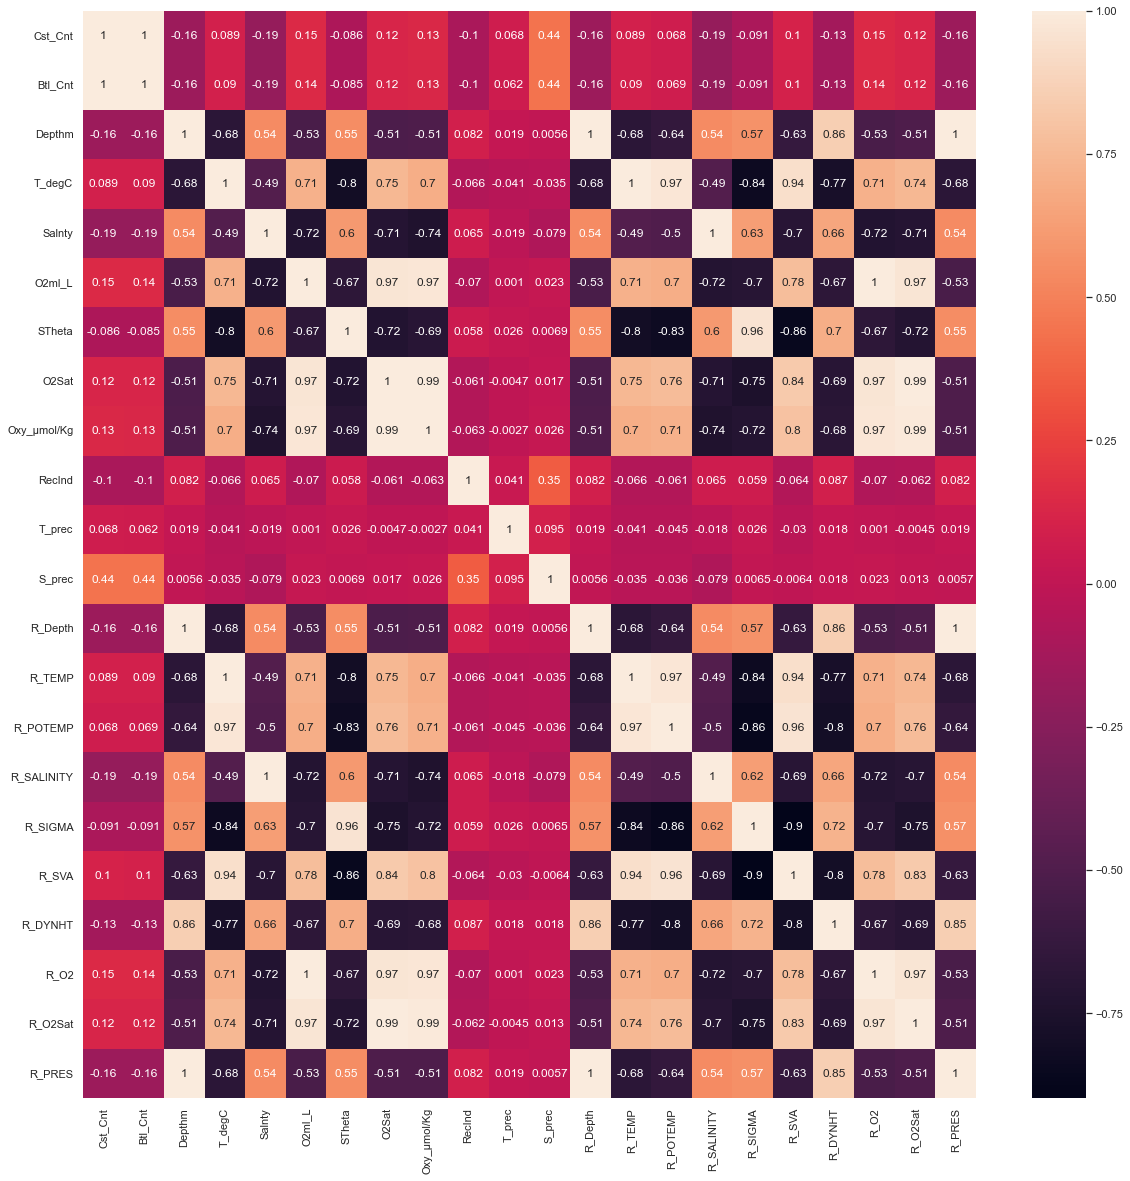

In [162]:
corrMatrix = corrMatrix_df.corr()

sns.set(rc = {'figure.figsize':(20,20)})

dataplot = sns.heatmap(corrMatrix, cmap="rocket", annot=True)

# DROP PERFECTLY CORRELATED COLUMNS 

In [229]:
#Depthm and R_depth
#TdegreeC R_temp

corrMatrix_df1 = corrMatrix_df.drop(['Btl_Cnt', 'R_Depth', 'Depthm', 'R_TEMP', 
                                   'R_SALINITY', 'O2ml_L'], axis = 1)


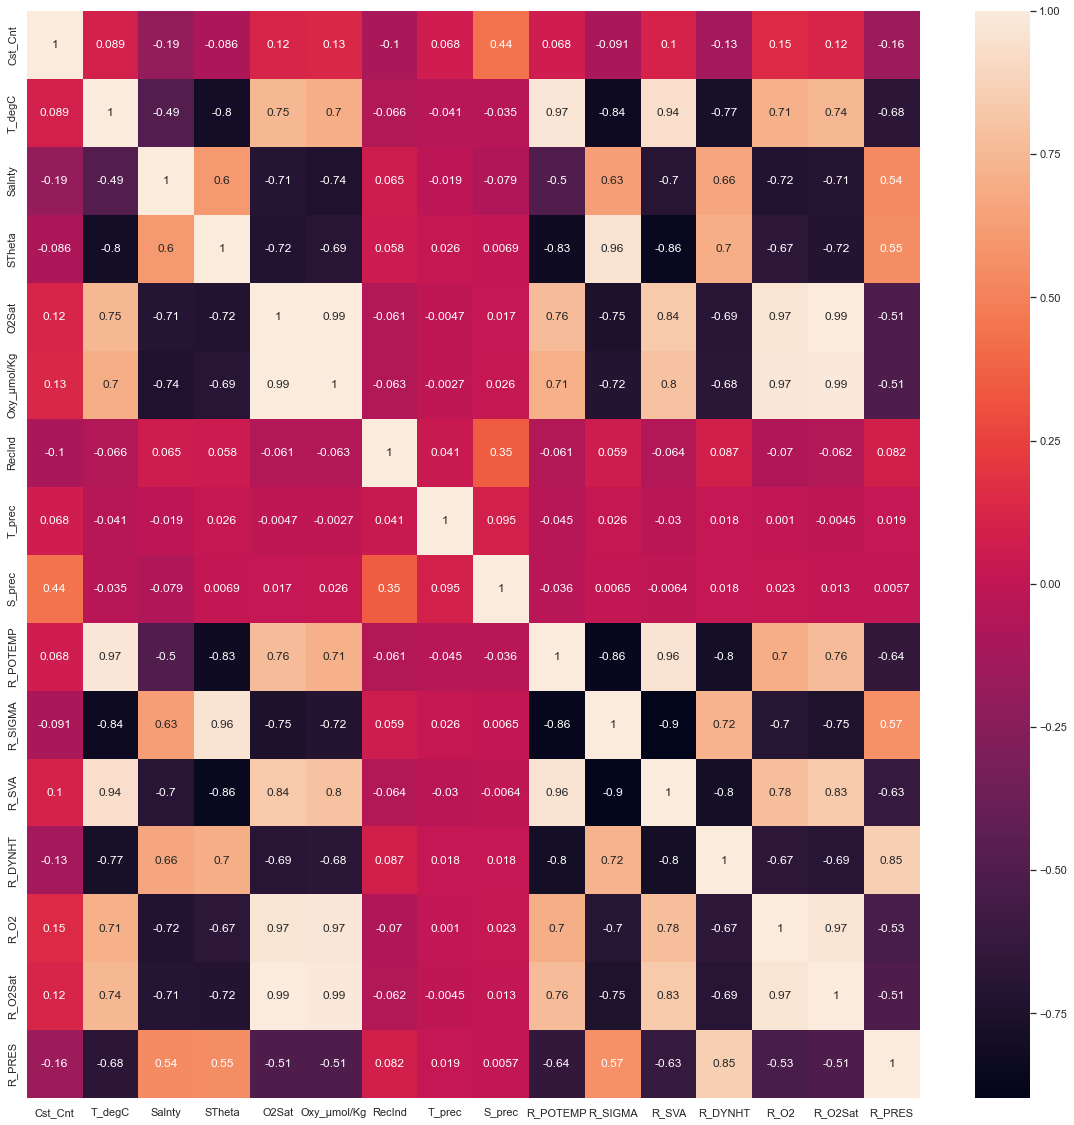

In [230]:
corrMatrix1 = corrMatrix_df1.corr()

sns.set(rc = {'figure.figsize':(20,20)})

dataplot = sns.heatmap(corrMatrix1, cmap="rocket", annot=True)

In [231]:
#All columns with any correlation with Target Variable
col_target = abs(corrMatrix1['T_degC'])

#Selecting highly correlated features with Target Variable
corr_features = col_target[col_target>0.5] 
corr_features





T_degC         1.000000
STheta         0.804295
O2Sat          0.745131
Oxy_µmol/Kg    0.696899
R_POTEMP       0.973582
R_SIGMA        0.836170
R_SVA          0.935155
R_DYNHT        0.774224
R_O2           0.712731
R_O2Sat        0.743683
R_PRES         0.677289
Name: T_degC, dtype: float64

Selecting features that are uncorrelated with each other from above:

- R_POTEMP
- O2Sat

# Lasso for Feature Selection

In [163]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [232]:
X = np.array(corrMatrix_df1.drop('T_degC', axis=1))


#.reshape(-1,1)
X.shape

(864863, 15)

In [233]:
y = np.array(corrMatrix_df1['T_degC']).reshape(-1,1)
y.shape

(864863, 1)

In [234]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.6)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-7.15570411e-07  0.00000000e+00 -0.00000000e+00  3.15929736e-02
 -1.67273859e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.05765392e-01  0.00000000e+00  2.32462321e-02  0.00000000e+00
  0.00000000e+00  2.76975066e-03 -1.73452447e-03]


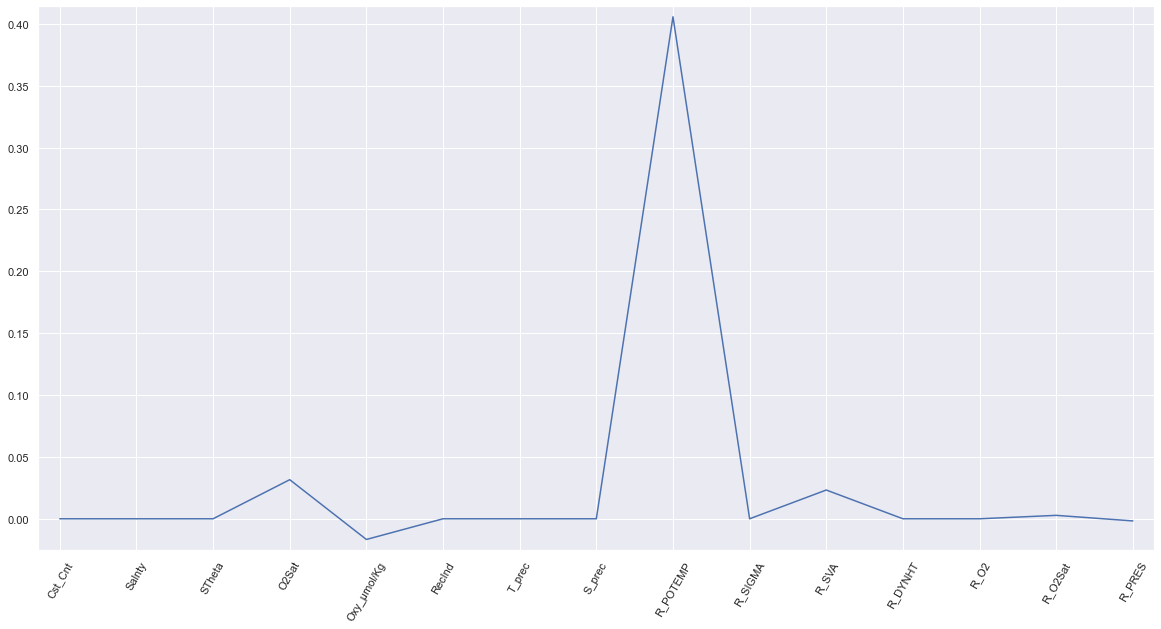

In [235]:
features = corrMatrix_df1.drop('T_degC', axis = 1).columns

# Plot the coefficients
plt.figure(figsize=(20, 10))
plt.plot(range(len(features)), lasso_coef)
plt.xticks(range(len(features)), features.values, rotation=60)
plt.margins(0.02)
plt.show()

According to the graph, O2Sat, R_POTEMP and R_SVA are highly correlated with water temperarure. 

3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [129]:
Numerical_DF1.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_PRES'],
      dtype='object')

In [178]:
# for multiple linear regressions we need to use variables that
# are uncorrelated with eachother in out equation

X1 = Numerical_DF1[['R_Depth','O2Sat']] #independent variables 
y1 = Numerical_DF1['T_degC'] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=32)

#x1 = m2x2 + m5x5


regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred = regression.predict(X_test)
accuracy_score = regression.score(X_test,y_test)
accuracy_score #SAME AS r2

#NOTE TO SELF
    #the score increases as you add an additional independant variables as rarely dependent
    #variables are predicted on just one factor!



0.6745610923441375

In [180]:
regression.coef_

# What is the equation for the model?
# x1 = -0.005(R_Depth) + 0.07(O2Sat)

array([-0.00536823,  0.06997302])

x1 = -0.005(R_Depth) + 0.07(O2Sat)

4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

Multiple linear regression appraoch had a better performance than the linear regression approach done last week with just one feature (Salnty) which had an accuracy of just 24% . This approach predicted the water temperature based on two features and the performance had 67% accuracy as compared to the single linear regression from last week.This is because the score tends to increase as you add additional independant variables. 

5.	Work with the diabetes dataset to perform multiple logistic regression. 

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import logit

In [216]:
diabetes_df = pd.read_csv("diabetes copy2.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing-Check for NaNs

In [142]:
len(diabetes_df)

768

In [143]:
print(diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Correlation Matrix- to pick out feature variables

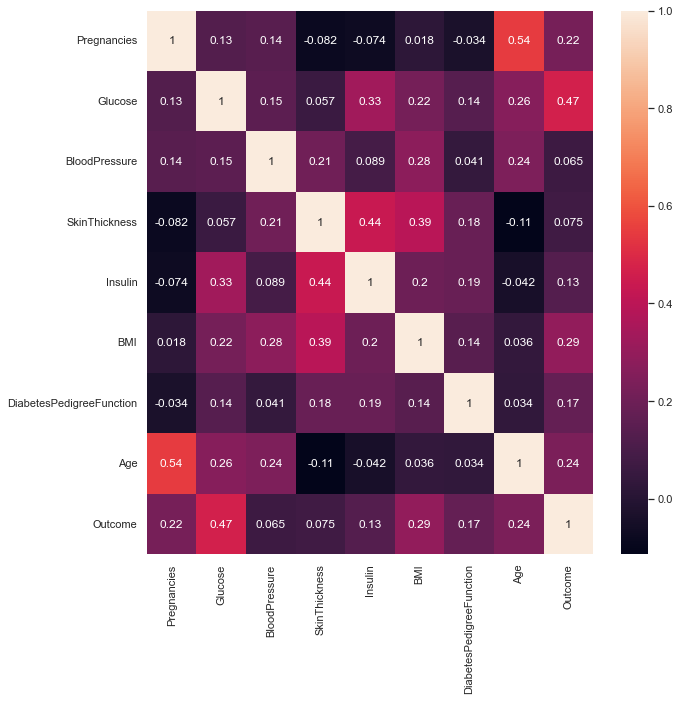

In [145]:
corrMatrix = diabetes_df.corr()

sns.set(rc = {'figure.figsize':(10,10)})

dataplot = sns.heatmap(corrMatrix, cmap="rocket", annot=True)

Outcome is correlated with the following in order from high to low:

- Glucose 
- BMI
- Age 
- Pregnancies 

# Logit

In [224]:
#interaction: An interaction occurs if the relation between one predictor, X, 
#and the outcome (response) variable, Y, depends on the value of another independent variable, Z

#Age and Glucose are have a weak correlation with each other


age_gl_int = logit('Outcome ~ Age + Glucose + Age * Glucose', data=diabetes_df).fit()
print(age_gl_int.params)
# Outcome = -9.5 + 0.12*Age + 0.06*Glucose - 0.0008*Age*Glucose

Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


# Logistic regression

In [146]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [147]:
#Logistic regression approach
regression = LogisticRegression(random_state=0).fit(X_train, y_train)

y_predicted = regression.predict(X_test)

In [148]:
regression.score(X_test, y_test)

0.7077922077922078

In [149]:
accuracy = regression.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  70.77922077922078 %


# Check if accuracy improves if only the highly correlated features are used

In [157]:
X1 = diabetes_df[['Glucose','BMI', 'Age', 'Pregnancies']]
y1 = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=42, stratify=y1)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Logistic regression approach
regression = LogisticRegression(random_state=0).fit(X_train, y_train)

y_predicted = regression.predict(X_test)

regression.score(X_test, y_test)

0.7077922077922078

6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

The models to evalute performance are derived from the confusion matrix. 
Besides accuracy, you can use precision, recall and F1score. 

Precision or the positive predicted value is true positives divided by true positives plus false positives.
Meaning, out of all the values predicted as positives how many were true. Precision is the rate of true positives to all predicted postives(true and false). It is the rate of how precise we were with true positives and true negatives

    - Precision--out of all the ones you declared were positive, what percent actually were? 

Recall or Sensitivity/true positive rate is true positives divided by true positives plus false negatives.

    - Recall-- out of all the ones that were truely positive, what percent did you catch? 


F1score is 2 times (precision times recall) / (precision plus recall). 


The best appraoch for the diabetes dataset would be recall since it is worse to have a false negative (incorrectly assuming someone does not have diabetes when in fact they do) than it is to have a false positive. 

In [159]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



The above classification report is saying for all of the '0s' (Not diabetic or true negatives), there was a 76% precision in our prediction (I was 76% correct in predicting true negatives.) For all the '1s' (Diabetic or true positives) there was a 59% precison. (I was 59% correct in predicting true positives.) 

Since recall value for 1, true positives (diabetic) is 54% that means this model is not that good in predicting the positive cases since it has a high number of false negatives (inaccuratly labeled as non-diabetic). Approximately half of the cases were false negatives.



7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

In [183]:
#class weight
#tolerance

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Logistic regression approach
regression = LogisticRegression(random_state=0).fit(X_train, y_train)

y_predicted = regression.predict(X_test)

regression.score(X_test, y_test)

0.7077922077922078

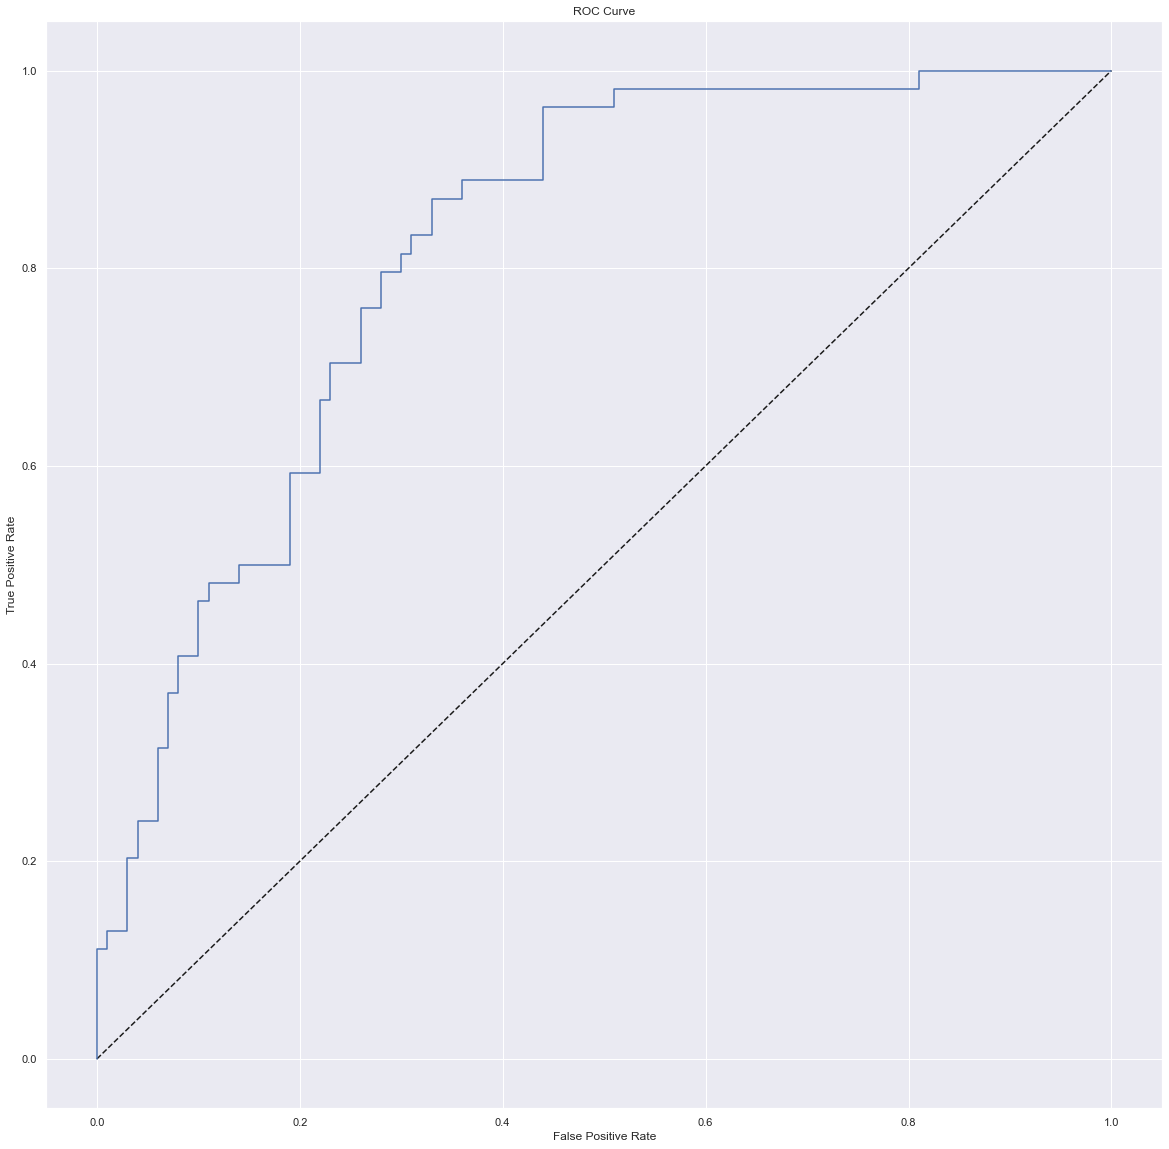

In [184]:
#WE HAVE TO FIND THE RIGHT THRESHOLD THAT WOULD INCREASE THE RECALL SCORE

from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = regression.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

I would think that KNN is not as performant as logistic regression. This is because KNN does not work well with large datasets and is sensitive to features that are irrelevent. But according to the recall score below, both are performant.  

- To see which model is more performant, I calculated the recall(most relevant metric) for KNN and LR

In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
#Empty list model is created 

classifiers = []

#Each classifier models is initiated with the default syntax 
#the model is added to the list
classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('LR', LogisticRegression()))

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [219]:
#I split the data into training and test sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_df.Outcome, random_state=0)

In [220]:
#In the loop, I will fit the model(both KNN and LR) to the training set 
#Then calculate the recall


names = []
recall = []
for name, c in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall.append(recall_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Recall': recall})
print(tr_split)

  Name    Recall
0  KNN  0.597015
1   LR  0.597015


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

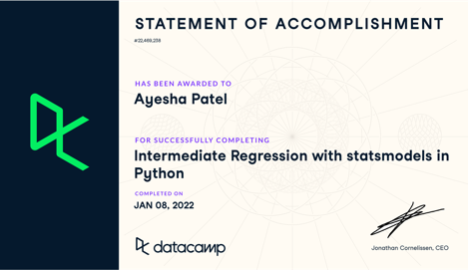